# Busy Town


In [1]:
from utils import *
from training import *
from policies import *
from envs import *

## The Environement
![The map](figures/busy_town.png)

Each step induces a reward of -1. Arriving in the center has a 1/10 chance of inducing a reward of -15 instead. Reaching the objective cell induces a reward of +6
## Training with CPT-PG with a risk-averse $w$

## The Environement
![The map](figures/busy_town.png)

Each step induces a reward of -1. Arriving in the center has a 1/10 chance of inducing a reward of -15 instead. Reaching the objective cell induces a reward of +6
## Training with CPT-PG with a risk-averse $w$

Batch n°499	Average length: 3.99	Mean return: 2.75 	Mean utility: 2.75	Mean CPT value: 1.5750000000000073	Entropy coefficient: 0.009999999999999787
  | 0 | 1 | 2 | 
----------------
0 | → | → | ↓ | 
----------------
1 | ↑ | ? | G | 
----------------
2 | ↑ | ↑ | ↑ | 
----------------


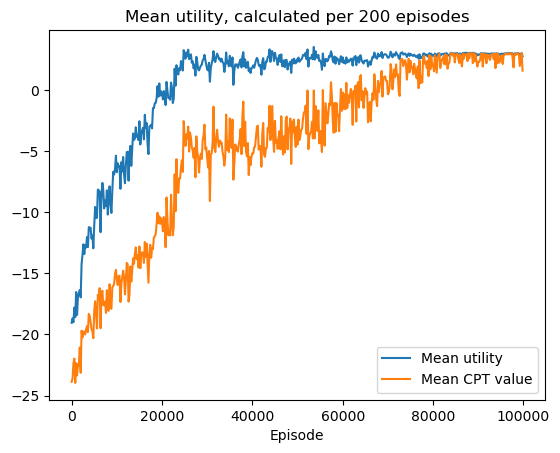

Loading best state


In [2]:
policy =MLP_thin()
optimizer = optim.Adam(policy.parameters(), lr=0.01)

L,Lu,Lx,Lcpt,_ = train(policy, optimizer, env=BusyTown(random_start=False),num_episodes=500, batch_size= 200,changing_entropy=True, entropy_max=5,entropy_min = 0, draw_policy=True, w=risk_averse_w)


We see in the diagram printed above the plot that the policy we found goes *around* the city center.

## Training with CPT-PG with the risk-neutral $w$ (identity)

Althrough it is not necessarily the fastest way, we run the risk-neutral experiment with the same hyperparameters as the previous one, changing only the $w$, in order to compare.

Batch n°499	Average length: 2.09	Mean return: 3.51 	Mean utility: 3.51
  | 0 | 1 | 2 | 
----------------
0 | ? | ? | ↓ | 
----------------
1 | → | → | G | 
----------------
2 | ? | ? | ↑ | 
----------------


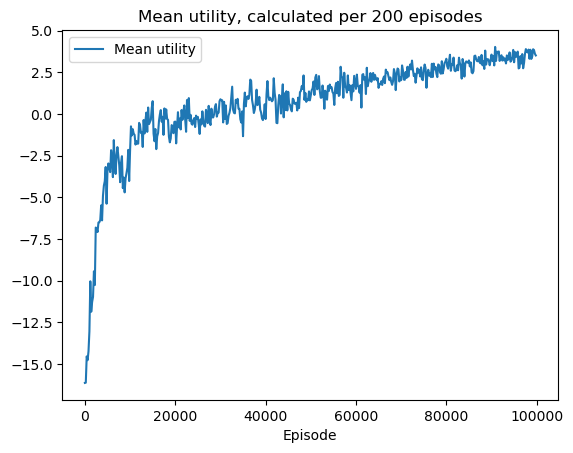

Loading best state


In [3]:
policy_risk_neutral =MLP_thin()
optimizer_risk_neutral = optim.Adam(policy_risk_neutral.parameters(), lr=0.01)

out = train(policy_risk_neutral, optimizer_risk_neutral, env=BusyTown(random_start=False),num_episodes=500, batch_size= 200,changing_entropy=True, entropy_max=5,entropy_min = 0, draw_policy=True, w=None)

We see in the diagram printed above the plot that the policy we found goes *directly through* the city center.